In [69]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [71]:
df = pd.read_csv('monthly-product-production-in-austr.csv')

In [72]:
df.head()

,Month,Monthly product production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       476 non-null    object 
 1   Monthly product production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [74]:
df.Month = pd.to_datetime(df.Month)

In [75]:
df = df.set_index("Month")
df.head()

,Monthly product production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [76]:
df.index.freq = 'MS'

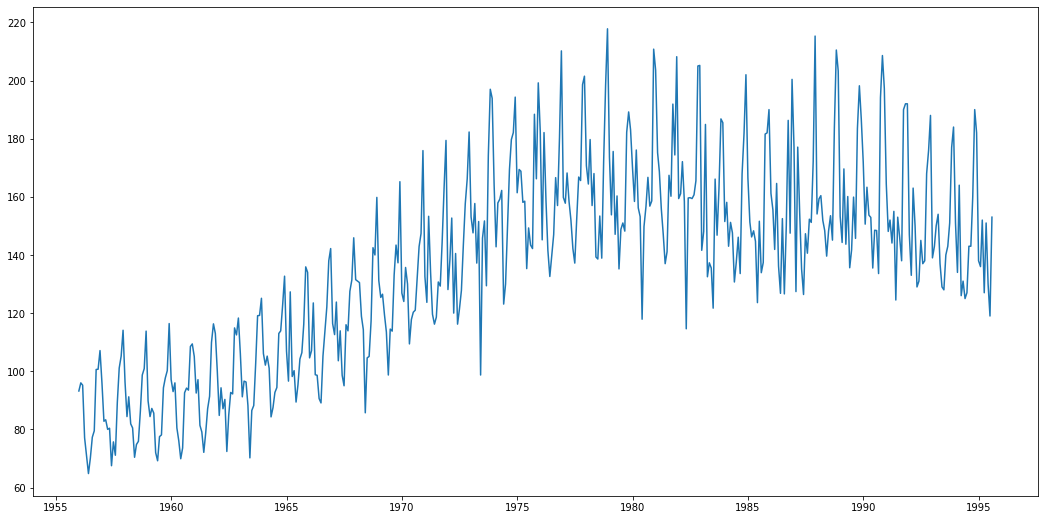

In [77]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly product production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

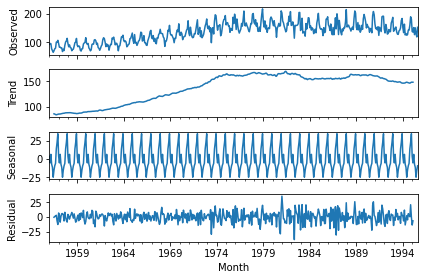

In [78]:
a = seasonal_decompose(df["Monthly product production"], model = "add")
a.plot();

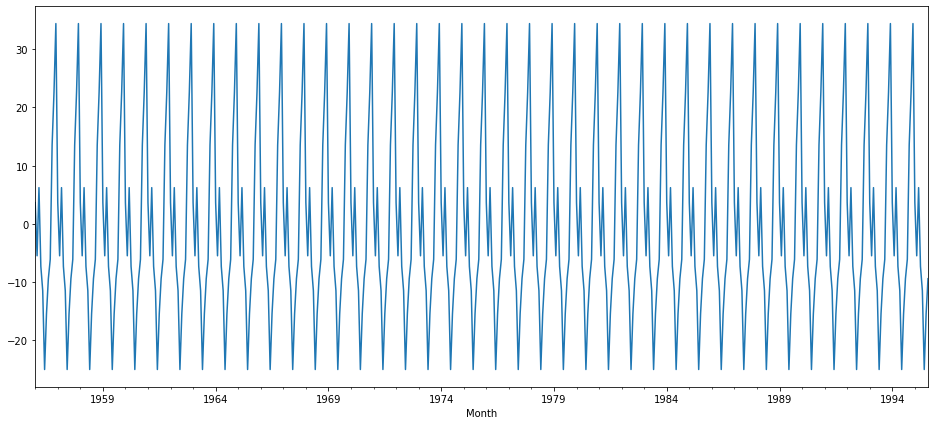

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

# **ARIMA Forecast:**

In [80]:
#auto_arima(df['Monthly product production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

In [81]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [82]:
arima_model = SARIMAX(train_data['Monthly product production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:         Monthly product production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, 3, 12)   Log Likelihood               -1708.037
Date:                            Fri, 12 Aug 2022   AIC                           3438.074
Time:                                    11:45:53   BIC                           3483.589
Sample:                                01-01-1956   HQIC                          3455.992
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1233      0.043     -2.892      0.004      -0.207      -0.040
ar.L2         -0.1686      0.046     -3.686      0.000      -0.258      -0.079
ma.L1         -0.8442      0.028    -30.294      0.000      -0.899      -0.790
ar.S.L12       1.7542      0.116     15.138      0.000       1.527       1.981
ar.S.L24      -1.6030      0.223     -7.174      0.000      -2.041      -1.165
ar.S.L36       0.7783      0.174      4.486      0.000       0.438       1.118
ar.S.L48       0.0692      0.061      1.127      0.260      -0.051       0.190
ma.S.L12      -1.5539      0.128    -12.124      0.000      -1.805      -1.303
ma.S.L24       1.3831      0.215      6.443      0.000       0.962       1.804
ma.S.L36      -0.6484      0.124     -5.232      0.000      -0.891      -0.406
sigma2        83.8102      4.862     17.237      0.000      74.281      93.340
===================================================================================
Ljung-Box (Q):                       91.98   Jarque-Bera (JB):                41.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.09   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.819578
1994-10-01    157.980641
1994-11-01    182.064426
1994-12-01    183.478101
1995-01-01    144.808302
1995-02-01    136.682553
1995-03-01    151.075347
1995-04-01    133.068040
1995-05-01    137.826455
1995-06-01    120.558874
1995-07-01    128.436446
1995-08-01    138.755618
Freq: MS, Name: ARIMA Predictions, dtype: float64

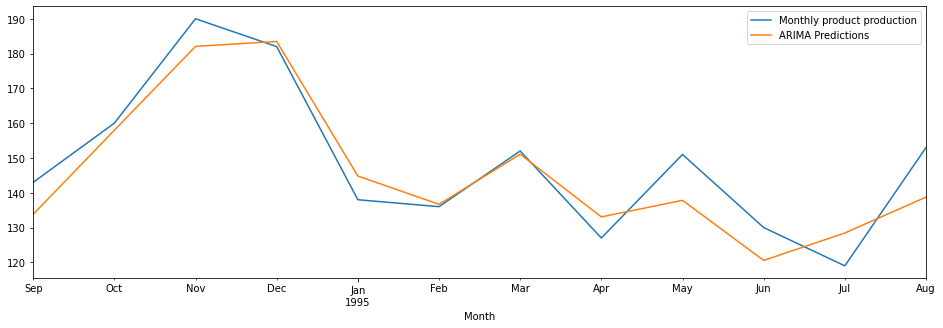

In [84]:
test_data['Monthly product production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [85]:
arima_mape_error = mean_absolute_percentage_error(test_data['Monthly product production'], arima_pred)
arima_rmse_error = rmse(test_data['Monthly product production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly product production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}\nMean Absolute Percentage Error: {arima_mape_error}','%')

MSE Error: 66.05309277872249
RMSE Error: 8.127305382395969
Mean: 136.3953781512605
Mean Absolute Percentage Error: 4.726576761151429 %


In [86]:
test_data['ARIMA_Predictions'] = arima_pred

In [87]:
test_data['ARIMA_Predictions']

Month
1994-09-01    133.819578
1994-10-01    157.980641
1994-11-01    182.064426
1994-12-01    183.478101
1995-01-01    144.808302
1995-02-01    136.682553
1995-03-01    151.075347
1995-04-01    133.068040
1995-05-01    137.826455
1995-06-01    120.558874
1995-07-01    128.436446
1995-08-01    138.755618
Freq: MS, Name: ARIMA_Predictions, dtype: float64

# **Holt-Winter Forecast**

In [88]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
holt_winter_model = ExponentialSmoothing(train_data['Monthly product production'],trend='mul',seasonal='mul',seasonal_periods=12)
holt_winter_result = holt_winter_model.fit()
holt_winter_result.summary()

Dep. Variable:,endog,No. Observations:,464
Model:,ExponentialSmoothing,SSE,44499.547
Optimized:,True,AIC,2149.394
Trend:,Multiplicative,BIC,2215.632
Seasonal:,Multiplicative,AICC,2150.931
Seasonal Periods:,12,Date:,"Fri, 12 Aug 2022"
Box-Cox:,False,Time:,11:45:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0755289,alpha,True
smoothing_slope,0.0754312,beta,True


In [90]:
holt_winter_pred = holt_winter_result.predict(start = len(train_data), end = len(df)-1).rename("HOLT WINTER Predictions")
holt_winter_pred

1994-09-01    134.342243
1994-10-01    157.939620
1994-11-01    167.230106
1994-12-01    178.056245
1995-01-01    144.868484
1995-02-01    134.849943
1995-03-01    147.484238
1995-04-01    134.246458
1995-05-01    129.309871
1995-06-01    116.865999
1995-07-01    126.166528
1995-08-01    129.945831
Freq: MS, Name: HOLT WINTER Predictions, dtype: float64

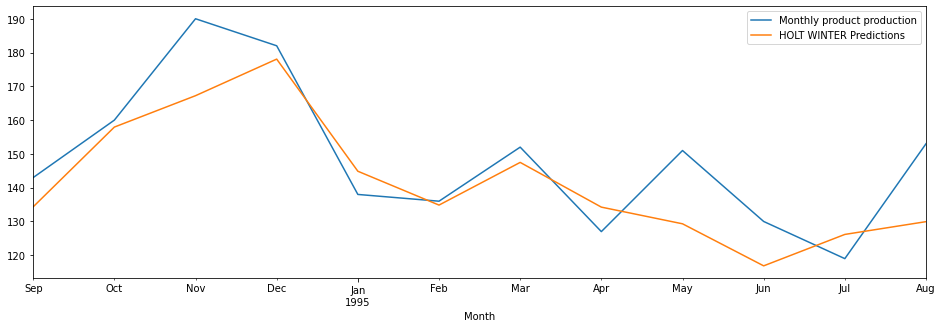

In [91]:
test_data['Monthly product production'].plot(figsize = (16,5), legend=True)
holt_winter_pred.plot(legend = True);

In [92]:
holt_winter_mape_error = mean_absolute_percentage_error(test_data['Monthly product production'], holt_winter_pred)
holt_winter_rmse_error = rmse(test_data['Monthly product production'], holt_winter_pred)
holt_winter_mse_error = holt_winter_rmse_error**2
mean_value = df['Monthly product production'].mean()

print(f'MSE Error: {holt_winter_mse_error}\nRMSE Error: {holt_winter_rmse_error}\nMean: {mean_value}\nMean Absolute Percentage Error: {holt_winter_mape_error}','%')

MSE Error: 163.37022125360616
RMSE Error: 12.78163609455402
Mean: 136.3953781512605
Mean Absolute Percentage Error: 6.795875440824786 %


In [93]:
test_data['HOLT_WINTER_Predictions'] = holt_winter_pred

# **Prophet Forecast**

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Monthly product production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [95]:
df_pr = df.copy()
df_pr = df.reset_index()

In [96]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [97]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [98]:
from prophet import Prophet

In [99]:
df_pr = df.copy()
df_pr = df.reset_index()

In [100]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [101]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [102]:
from prophet import Prophet

In [103]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmt7qimrw/rdj_casr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmt7qimrw/w6s1fzwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41594', 'data', 'file=/tmp/tmpmt7qimrw/rdj_casr.json', 'init=/tmp/tmpmt7qimrw/w6s1fzwv.json', 'output', 'file=/tmp/tmp44awfnmd/prophet_model-20220812114554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:45:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:45:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.042775,130.055438,155.463603,150.976187,151.089440,-7.957017,-7.957017,-7.957017,-7.957017,-7.957017,-7.957017,0.0,0.0,0.0,143.085758
472,1995-05-01,150.978445,126.409907,151.510972,150.883700,151.046540,-11.393118,-11.393118,-11.393118,-11.393118,-11.393118,-11.393118,0.0,0.0,0.0,139.585327
473,1995-06-01,150.911971,114.287015,138.734070,150.779362,151.009183,-23.903929,-23.903929,-23.903929,-23.903929,-23.903929,-23.903929,0.0,0.0,0.0,127.008042
474,1995-07-01,150.847641,123.294183,147.465001,150.684336,150.974007,-15.751637,-15.751637,-15.751637,-15.751637,-15.751637,-15.751637,0.0,0.0,0.0,135.096004
475,1995-08-01,150.781167,128.578270,153.280399,150.582909,150.937905,-9.209617,-9.209617,-9.209617,-9.209617,-9.209617,-9.209617,0.0,0.0,0.0,141.571549


In [105]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [106]:
prophet_pred = prophet_pred.set_index("Date")

In [107]:
prophet_pred.index.freq = "MS"

In [108]:
prophet_pred

,Pred
Date,
1994-09-01,144.980093
1994-10-01,166.012371
1994-11-01,173.630147
1994-12-01,185.881584
1995-01-01,155.162766
1995-02-01,146.730689
1995-03-01,158.843312
1995-04-01,143.085758
1995-05-01,139.585327


In [109]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [110]:
import seaborn as sns

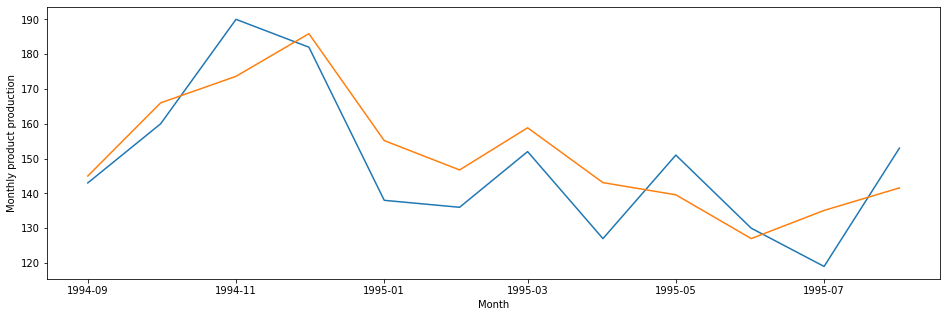

In [111]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly product production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [112]:
prophet_mape_error = mean_absolute_percentage_error(test_data['Monthly product production'], test_data["Prophet_Predictions"])
prophet_rmse_error = rmse(test_data['Monthly product production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly product production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}\nMean Absolute Percentage Error: {prophet_mape_error}','%')

MSE Error: 130.61135792732878
RMSE Error: 11.428532623540468
Mean: 136.3953781512605
Mean Absolute Percentage Error: 7.020209512555869 %


## **Comparitive Analysis of above 3 methods:**

In [113]:
rmse_errors = [arima_rmse_error, holt_winter_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, holt_winter_mse_error, prophet_mse_error]
mape_errors = [arima_mape_error, holt_winter_mape_error, prophet_mape_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "HOLT WINTER", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors, "MAPE Errors" : mape_errors})

In [114]:
test_data['ARIMA_Predictions'] = arima_pred
test_data['HOLT_WINTER_Predictions'] = holt_winter_pred
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

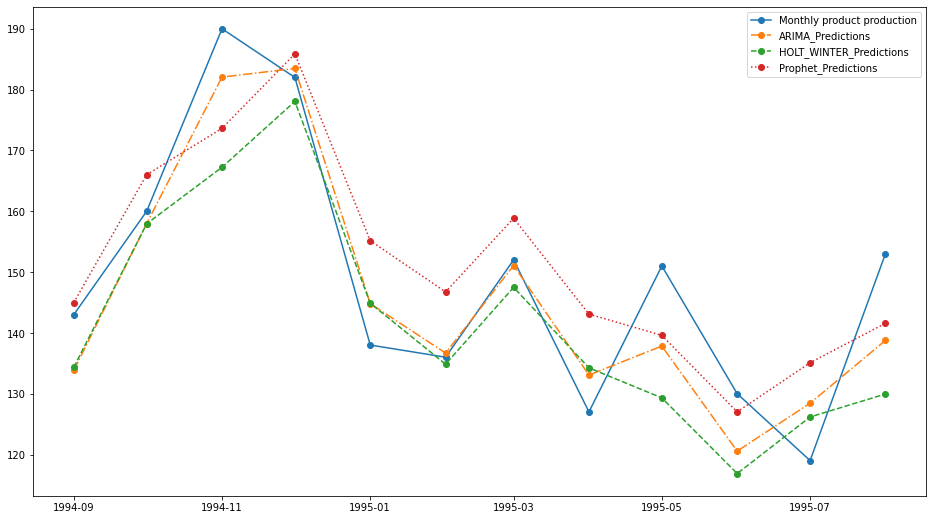

In [115]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly product production"], linestyle="-", label='Monthly product production')
plt.plot_date(test_data.index, test_data['ARIMA_Predictions'], linestyle="-.", label='ARIMA_Predictions')
plt.plot_date(test_data.index, test_data['HOLT_WINTER_Predictions'] , linestyle="--", label='HOLT_WINTER_Predictions')
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":", label='Prophet_Predictions')
plt.legend()
plt.show()

In [116]:
print(f"Mean: {test_data['Monthly product production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors,MAPE Errors
0,ARIMA,8.127305,66.053093,4.726577
1,HOLT WINTER,12.781636,163.370221,6.795875
2,Prophet,11.428533,130.611358,7.020210


In [117]:
test_data

,Monthly product production,HOLT_WINTER_Predictions,Prophet_Predictions,ARIMA_Predictions
Month,,,,
1994-09-01,143.0,134.342243,144.980093,133.819578
1994-10-01,160.0,157.939620,166.012371,157.980641
1994-11-01,190.0,167.230106,173.630147,182.064426
1994-12-01,182.0,178.056245,185.881584,183.478101
1995-01-01,138.0,144.868484,155.162766,144.808302
1995-02-01,136.0,134.849943,146.730689,136.682553
1995-03-01,152.0,147.484238,158.843312,151.075347
1995-04-01,127.0,134.246458,143.085758,133.068040
1995-05-01,151.0,129.309871,139.585327,137.826455
